In [1]:
import time, colorsys
import cv2
from numpy import record
from tracker_manager import *
from mjpg_stream import *
# from data_collector import *
from background import *

xilinx hardware acceleration


In [26]:
# video = VideoStream('https://cctvn.freeway.gov.tw/abs2mjpg/bmjpg?camera=10002')
video = cv2.VideoCapture('data/demo_raw.avi')
frameSize = (352, 240)
tracker_manager = TrackerManager(frameSize)
print("initialize background")
initialCount = 0
while initialCount < 200:
    ret, img = video.read()
    if not ret:
        continue
    tracker_manager.new_frame(img)
    cv2.imshow(f"{img.shape}", img)
    initialCount += 1
print("done")

initialize background
done


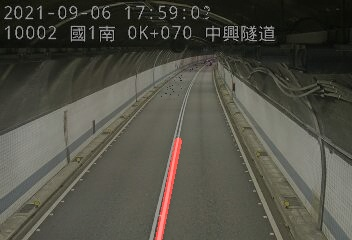

In [28]:
from IPython.display import display, Image
backdec = BackgroundDetector(tracker_manager.backgroundObject.getBackgroundImage())
_, img = cv2.imencode('.jpg', backdec.visualize_lines(backdec.backgroundImg))
display(Image(data=img.tobytes()))

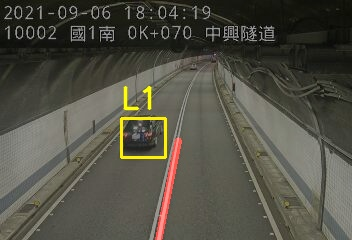

tracker removed id:1 duration:193.97584104537964
tracker removed id:2 duration:0.1927638053894043
tracker removed id:3 duration:0.20596623420715332
tracker removed id:4 duration:0.670142412185669
tracker removed id:5 duration:0.20243287086486816
tracker removed id:6 duration:0.05316901206970215
tracker removed id:7 duration:0.05413246154785156
tracker removed id:8 duration:0.3339862823486328
tracker removed id:9 duration:0.7715520858764648
tracker removed id:11 duration:0.07236027717590332
tracker removed id:10 duration:1.9942169189453125
tracker removed id:12 duration:2.210056781768799
tracker removed id:13 duration:1.29209566116333
tracker removed id:14 duration:0.12594842910766602
tracker removed id:15 duration:0.04261207580566406
tracker removed id:16 duration:0.31589794158935547
tracker removed id:18 duration:0.11340856552124023
tracker removed id:19 duration:0.42400598526000977
tracker removed id:20 duration:0.446763277053833
tracker removed id:21 duration:0.2012770175933838
trac

In [33]:
display_handle=display(Image(data=img), display_id=True)
while True:
    ret, img = video.read()
    if not ret:
        break

    tracker_manager.new_frame(img)
    img = backdec.visualize_lines(img)

    for t in tracker_manager.trackers:

        x, y, w, h = center2bbox(t.cur_bbox)
        t.position = backdec.getClassify((x+w/2, y+h))
        cv2.rectangle(img, (x, y), (x + w, y + h), np.array(colorsys.hsv_to_rgb(t.created_time%0.1*10, 1, 1))*255, 2)
        cv2.putText(
            img,
            f"L{int(t.position)}",
            (x, y - 10),
            cv2.FONT_HERSHEY_SIMPLEX,
            1.0,
            (0, 255, 255),
            2,
            cv2.LINE_AA,
        )

    _, frame = cv2.imencode('.jpg', img)
    display_handle.update(Image(data=frame.tobytes()))
    